# Projet 3 :
# Concevez une application au service de la santé publique

## Préambule

L'agence "Santé publique France" a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation. on souhaite y participer et proposer une idée d’application.

## Mission

1) Traitement du jeu de données :
- Réfléchissant à une idée d’application.
- Repérant des variables pertinentes.
- Nettoyage des données en : 
mettant en évidence les éventuelles valeurs manquantes, avec au moins 3 méthodes de   traitement adaptées aux variables concernées.
identifier et quantifier les éventuelles valeurs aberrantes de chaque variable.
- Automatisation des traitements pour éviter de répéter ces opérations.

2) Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement.
Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. 

3) Confirmer ou infirmer les hypothèses à l’aide d’une analyse multivariée. Effectuer les tests statistiques appropriés pour vérifier la significativité des résultats.

4) Justifier votre idée d’application. Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.

5) Rédiger un rapport d’exploration et pitcher votre idée durant la soutenance du projet.




## 1) Traitement du jeu de données :

##### Application de conseils  pour une alimentation saine et équilibrée  pour les personnes diabétiques

Aujourd’hui, on ne parle plus de régime pour les personnes diabétiques, mais d’une alimentation équilibrée. Celle-ci fait partie du traitement non médicamenteux du diabète, de même que la pratique d’une activité physique régulière adaptée.

(https://www.ameli.fr/assure/sante/themes/diabete/diabete-vivre-quotidien/equilibre-alimentaire/diabete-alimentation-fondamentaux#text_11726)

### chargement des bibilothèques

In [1]:
# Importation des bibliothèques

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn

### chargement du jeu de données

In [2]:
# Chargement du jeu de données df_food
df_food = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t')

/var/folders/47/jf50ppr146l7xm_wqy7ffcfr0000gn/T/ipykernel_14028/2008844685.py:2: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df_food = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t')


In [3]:
# Afficher les 5 premières lignes du jeu de données df_food

df_food.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Nombre de lignes et colonnes (taille du jeu de données df_food)

print(f"Nombre de (lignes, colonnes) = {df_food.shape}")

Nombre de (lignes, colonnes) = (320772, 162)


In [5]:
# Nombre des doublons dans le jeu de données df_food

print(f"Nombre des doublons = {df_food.duplicated(keep=False).sum()}")

Nombre des doublons = 0


In [6]:
# Informations sur le jeu de données df_food

df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [7]:
# types des données dans le jeu df_food
df_food.dtypes

code                        object
url                         object
creator                     object
created_t                   object
created_datetime            object
                            ...   
carbon-footprint_100g      float64
nutrition-score-fr_100g    float64
nutrition-score-uk_100g    float64
glycemic-index_100g        float64
water-hardness_100g        float64
Length: 162, dtype: object

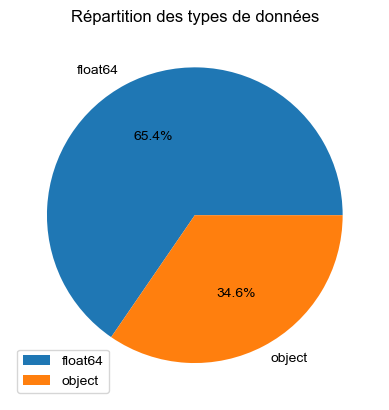

In [8]:
# visualisation de types des données dans le jeu df_food

df_food.dtypes.value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                   title="Répartition des types de données",
                                   legend=True, label="")
sns.set_theme()
plt.show()

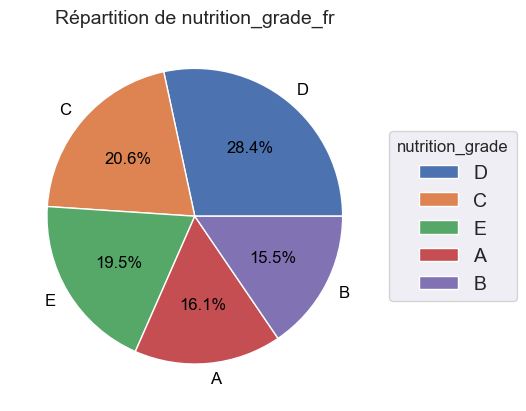

In [9]:
# visualisation de la  pie chart (diagramme circulaire) de la variable 'nutrition-score-fr_100g'

plt.title('Répartition de nutrition_grade_fr', size=14)
wedges, texts, autotexts = plt.pie(df_food['nutrition_grade_fr'].value_counts().values, 
        labels = df_food['nutrition_grade_fr'].value_counts().index.str.upper(),
                                   autopct='%1.1f%%', textprops={'fontsize': 12, 
                                     'color' : 'Black'}
       )
ax = plt.gca()
sns.set_theme()
ax.legend(wedges, df_food['nutrition_grade_fr'].value_counts().index.str.upper(),
          title='nutrition_grade',
          loc="center left",
          fontsize=14,
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [10]:
# Liste des colonnes
df_food.columns.tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

In [11]:
# somme de valeurs non nulles
df_food.notnull().sum()

code                       320749
url                        320749
creator                    320770
created_t                  320769
created_datetime           320763
                            ...  
carbon-footprint_100g         268
nutrition-score-fr_100g    221210
nutrition-score-uk_100g    221210
glycemic-index_100g             0
water-hardness_100g             0
Length: 162, dtype: int64

In [12]:
# % de valeurs manquantes par colonne
df_food.isna().mean()*100

code                         0.007170
url                          0.007170
creator                      0.000623
created_t                    0.000935
created_datetime             0.002806
                              ...    
carbon-footprint_100g       99.916452
nutrition-score-fr_100g     31.038245
nutrition-score-uk_100g     31.038245
glycemic-index_100g        100.000000
water-hardness_100g        100.000000
Length: 162, dtype: float64

Text(0.5, 1.0, 'Somme des valeurs non_nulles dans le jeu de données df_food')

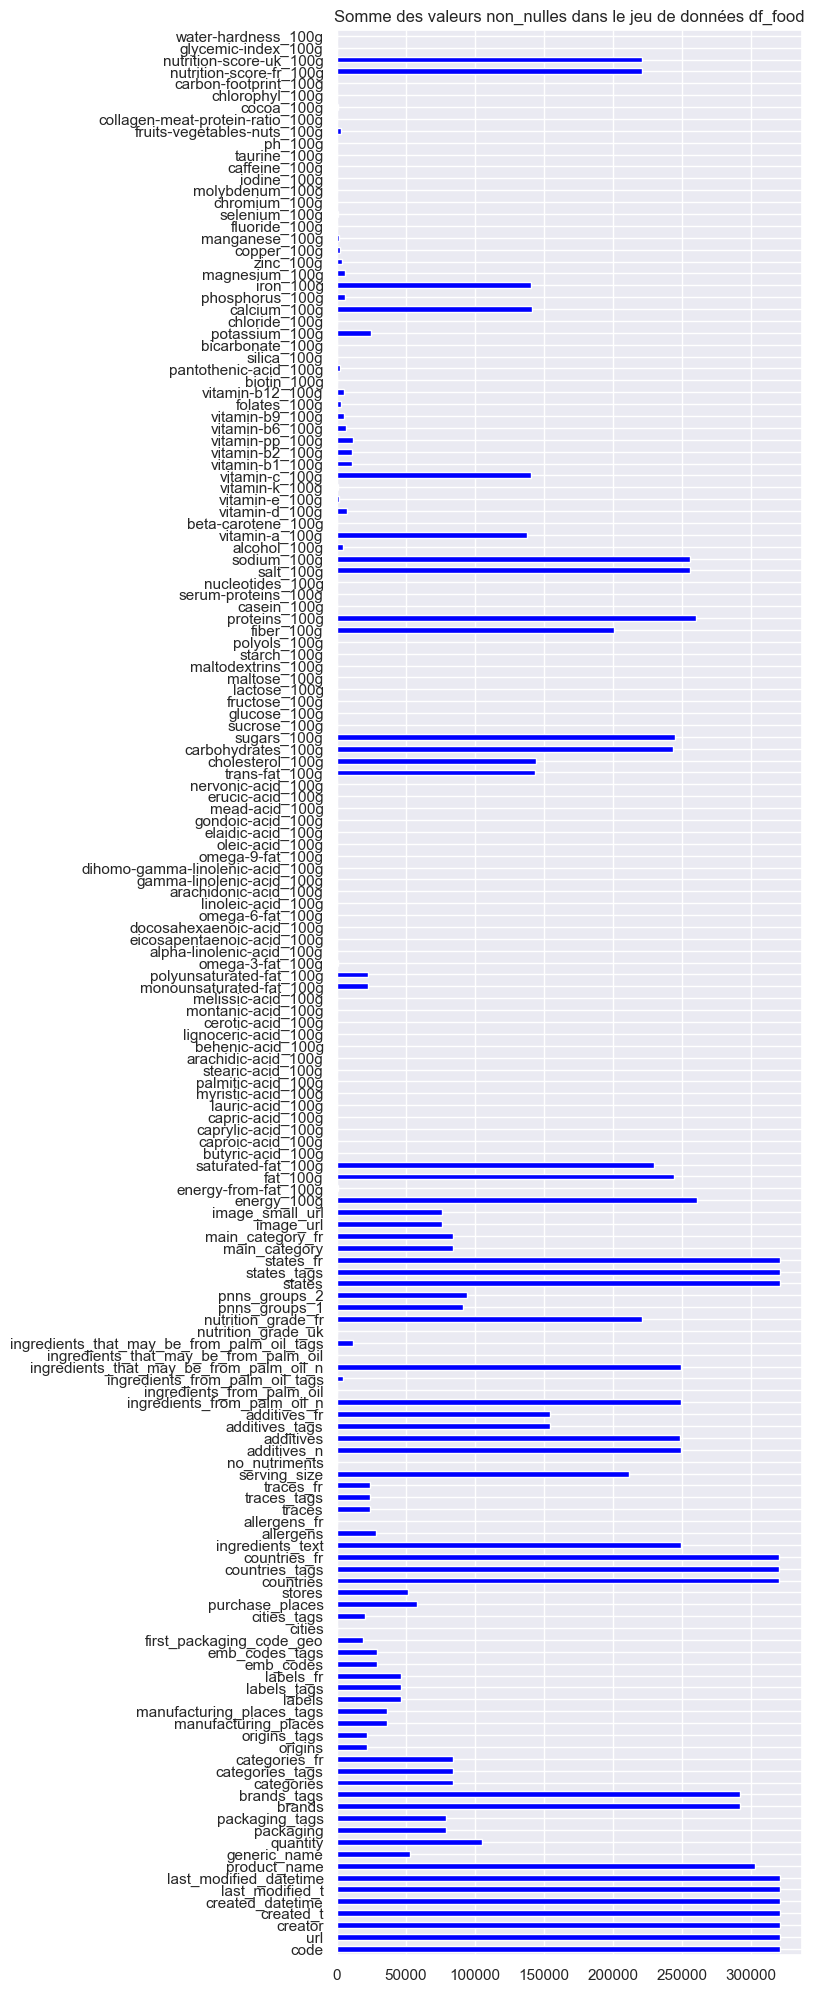

In [13]:
# visualisation de la somme des valeurs non_nulles dans le jeu de données df_food pour chaque variable
valeur_non_nulle = df_food.notnull().sum()
sns.set_theme()
figure = valeur_non_nulle.plot(kind='barh',figsize=(6, 25),color='blue')
figure.set_title("Somme des valeurs non_nulles dans le jeu de données df_food", fontsize=12)

Text(0.5, 1.0, '% Valeurs non nulles dans le jeu de données df_food')

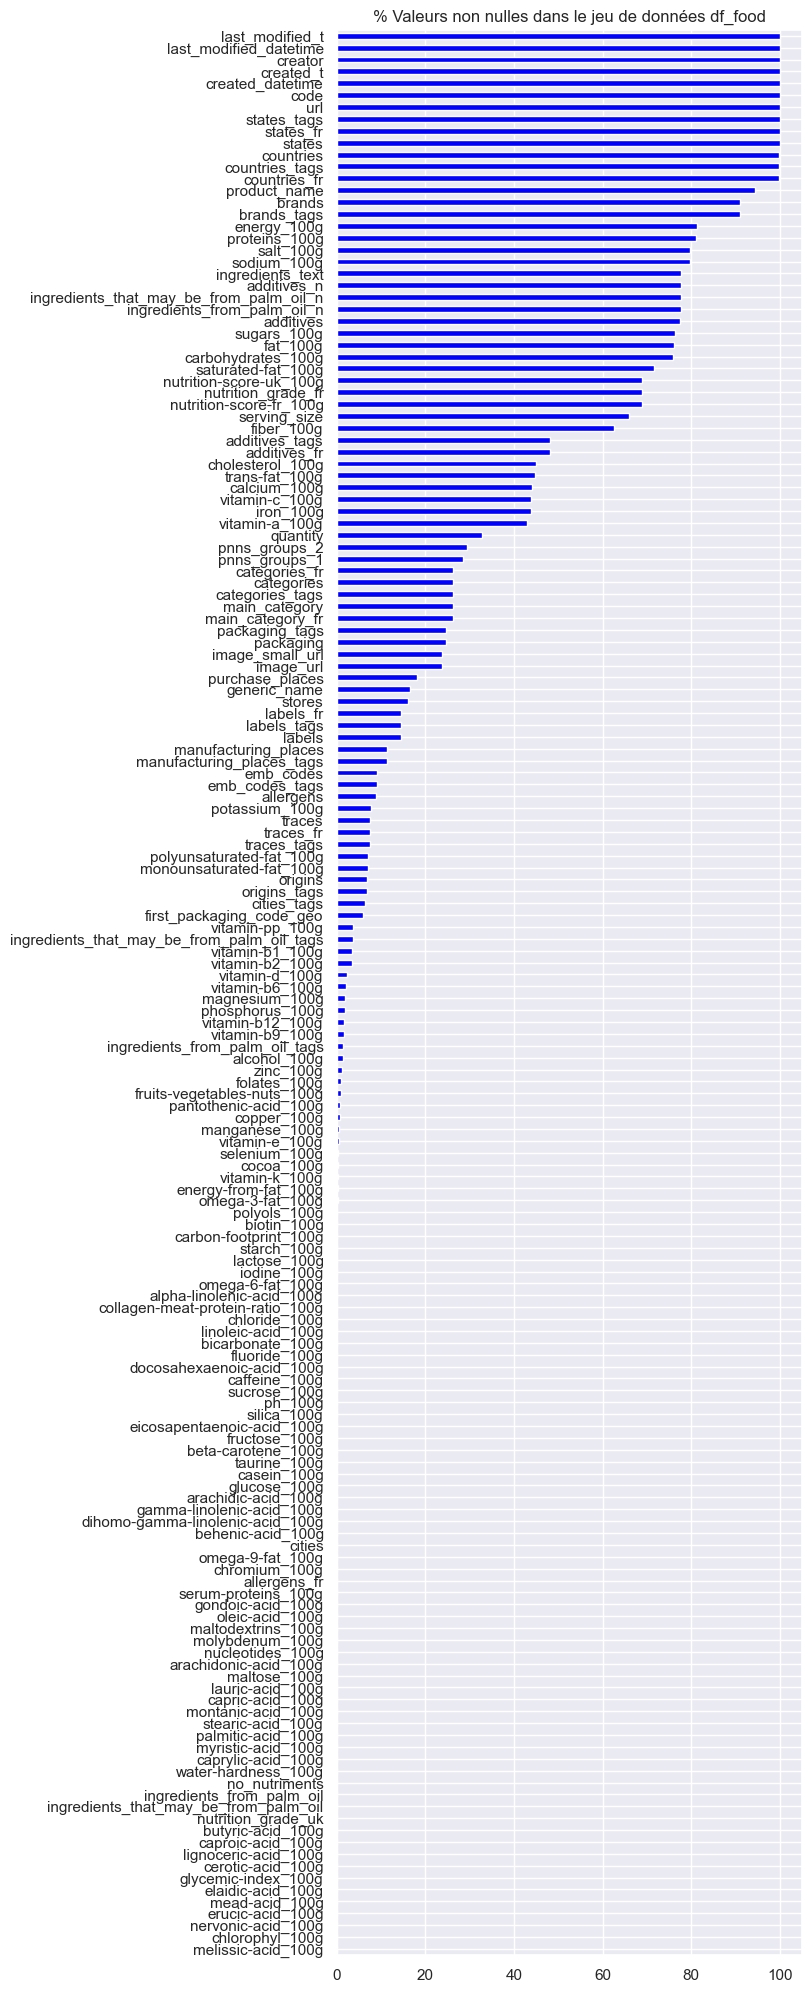

In [14]:
# visualisation du pourcentage de Valeurs manquantes dans le jeu de données df_food
sns.set_theme()
taille = df_food.shape
valeurs_notnull = df_food.notnull().sum()
valeurs_notnull = valeurs_notnull.sort_values(ascending=True)*100/taille[0]
figure = valeurs_notnull.plot(kind='barh',figsize=(6, 25),color='blue')
figure.set_title("% Valeurs non nulles dans le jeu de données df_food")

In [15]:
# Chercher les colonnes vides 
colonnes_vides = [colonne for colonne in df_food.columns if df_food[colonne].isnull().all()]

In [16]:
colonnes_vides

['no_nutriments',
 'ingredients_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil',
 'nutrition_grade_uk',
 'butyric-acid_100g',
 'caproic-acid_100g',
 'lignoceric-acid_100g',
 'cerotic-acid_100g',
 'melissic-acid_100g',
 'elaidic-acid_100g',
 'mead-acid_100g',
 'erucic-acid_100g',
 'nervonic-acid_100g',
 'chlorophyl_100g',
 'glycemic-index_100g',
 'water-hardness_100g']

In [17]:
# Nombre de colonnes vides
len(colonnes_vides)

16

### Filtrage du jeu de données

In [18]:
# Supprimer les colonnes vides

df_sans_cols_vides = df_food.drop(colonnes_vides, axis=1)

# ou bien on peut utiliser ce code : df_sans_cols_vides = df_food.dropna(how='all', axis=1)

In [19]:
# Afficher le jeu de données après la suppression des colonnes vides
df_sans_cols_vides

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,NaN,67g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Il reste 146 colonnes mais on va procéder à la suppression de toutes les colonnes qui contiennenet plus de 80% de valeurs nulles dans le dataset initiale 

In [20]:
# Ne conserver que les colonnes qui contiennent 20 % ou plus de données

df_food = df_food.dropna(how='any',axis=1,thresh=df_food.shape[0]*0.2)

In [21]:
df_food

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,...,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,1kg,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,3.6,3.57,0.00000,0.000,0.0,0.0214,0.000,0.00129,14.0,14.0
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,7.1,17.86,0.63500,0.250,0.0,0.0000,0.071,0.00129,0.0,0.0
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,7.1,17.86,1.22428,0.482,NaN,NaN,0.143,0.00514,12.0,12.0
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,1,Plastique,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,Plastique,...,0.0,0.00,0.00000,0.000,0.0,0.0000,0.000,0.00000,0.0,0.0
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,50 g,Plastique,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,67g,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Il reste 54 colonnes

Text(0.5, 1.0, '% Valeurs non nulles dans le jeu de données df_food')

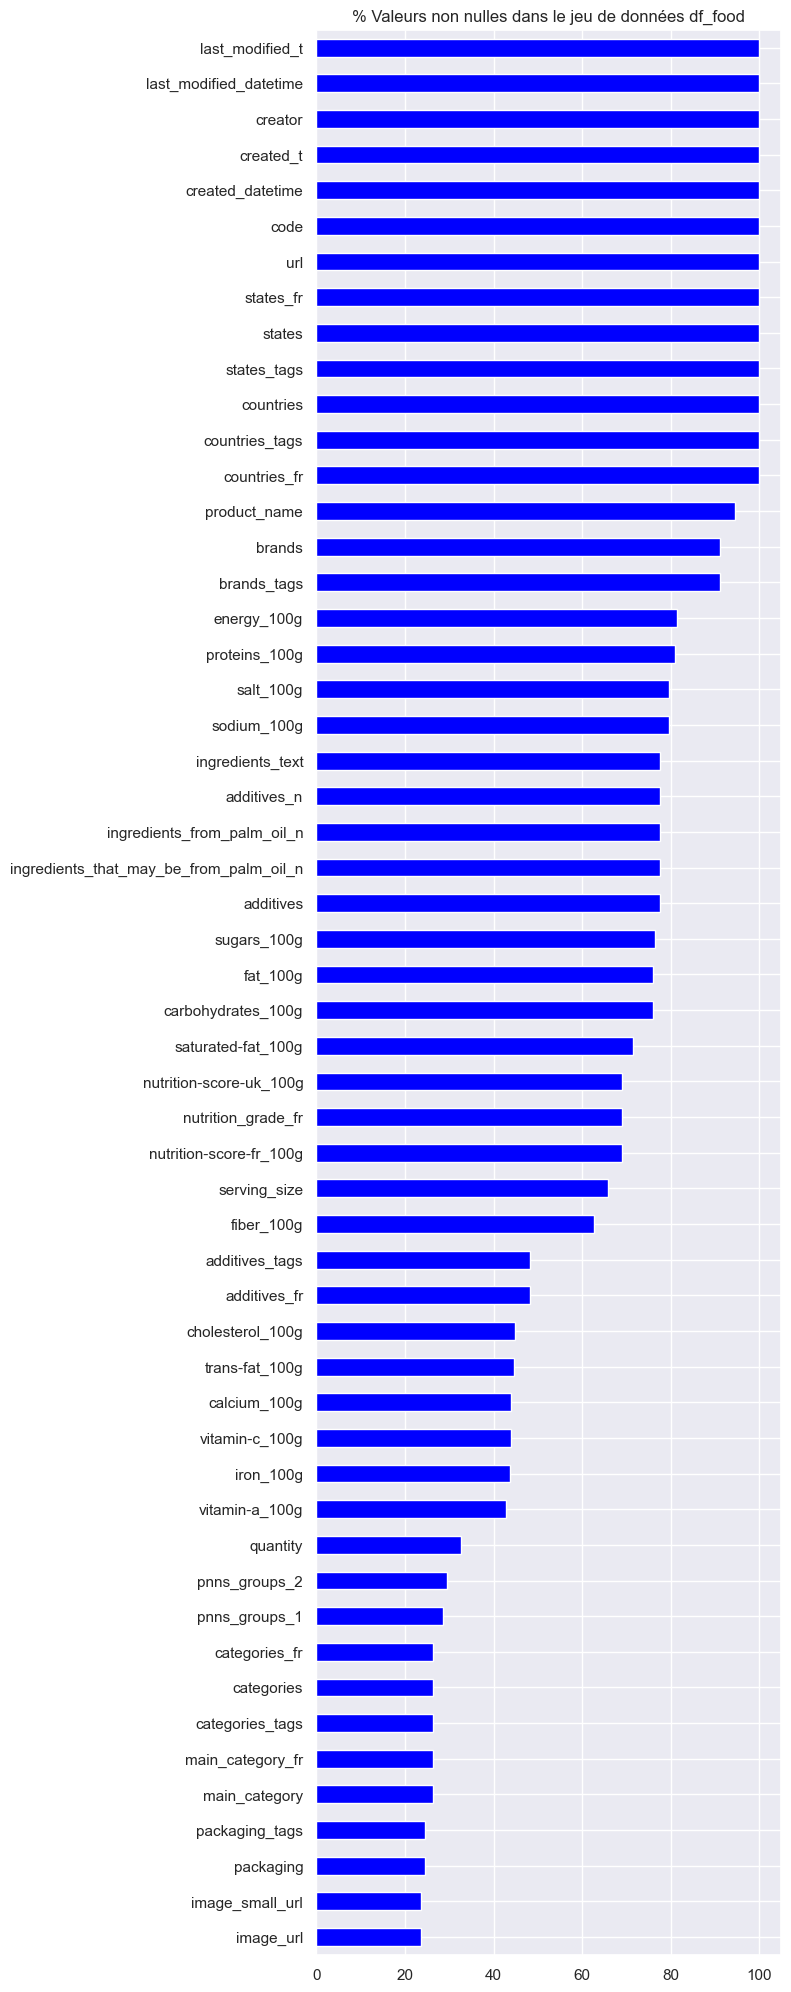

In [22]:
# visualisation du pourcentage de Valeurs manquantes dans le jeu de données df_food

sns.set_theme()
taille = df_food.shape
valeurs_notnull = df_food.notnull().sum()
valeurs_notnull = valeurs_notnull.sort_values(ascending=True)*100/taille[0]
figure = valeurs_notnull.plot(kind='barh',figsize=(6, 25),color='blue')
figure.set_title("% Valeurs non nulles dans le jeu de données df_food")

In [23]:
# afficher la liste des colonnes restantes 
df_food.columns.tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'serving_size',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'pnns_groups_2',
 'states',
 'states_tags',
 'states_fr',
 'main_category',
 'main_category_fr',
 'image_url',
 'image_small_url',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'vitamin-a_100g',
 'vitamin-c_100g',
 'calcium_100g',
 'iron_100g',
 'nutrition-score-fr_100g',
 'nutrition-score-uk_100g']

### Traitement des variables qualitatives

In [24]:
# Afficher les variables catégorielles 

df_food.select_dtypes(include=['O']).columns


Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity',
       'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories',
       'categories_tags', 'categories_fr', 'countries', 'countries_tags',
       'countries_fr', 'ingredients_text', 'serving_size', 'additives',
       'additives_tags', 'additives_fr', 'nutrition_grade_fr', 'pnns_groups_1',
       'pnns_groups_2', 'states', 'states_tags', 'states_fr', 'main_category',
       'main_category_fr', 'image_url', 'image_small_url'],
      dtype='object')

On va commencer par examiner la liste des pays

In [25]:
# afficher la listes des pays

df_food.countries.unique().tolist()

['en:FR',
 'US',
 'France',
 'en:GB',
 'France, US',
 'Canada',
 'United Kingdom',
 'en:CH',
 'en:ES',
 'Deutschland',
 'en:SI',
 'en:DE',
 'en:IT',
 'en:RO',
 'España',
 'en:AU',
 'en:PT',
 'United States',
 'Germany',
 'Usa',
 'France,Royaume-Uni',
 'UK,France',
 'France,Belgique,Pays-Bas,Royaume-Uni',
 'France,United Kingdom',
 'en:GP',
 'France,UK',
 'États-Unis',
 'Royaume-Uni,France',
 'en:CA',
 nan,
 'en:US,United Kingdom',
 'Switzerland',
 'en:US',
 'en:CA, US',
 'Nederland',
 'en:AU, en:france',
 'Australia',
 'France,Suisse,États-Unis,Canada',
 'États-Unis, en:france, US',
 'Ireland',
 'United Kingdom, US',
 'en:RE, en:france',
 'United States, en:france',
 'en:TW',
 'en:AU, Suisse',
 'Deutschland, en:france',
 'Suisse',
 'en:BR',
 'Belgique,France',
 'en:DO',
 'en:FR, US',
 'Belgique,France,Pays-Bas,Royaume-Uni',
 'France,United States',
 'Australie, US',
 'USA',
 'en:SA',
 'Saudi Arabia',
 'en:AE',
 'en:IQ',
 'en:KW',
 'Republica Moldova',
 'Belgium',
 'en:NC',
 'Singapore'

On va selectionner les données des produits français

In [26]:
Liste_france = ['en:FR', 
'France', 
'Nouvelle-Calédonie',
'FR', 
'en:fr', 
'Guyane, en:france', 
'en:France', 
'france', 
'Réunion',  
'French Polynesia',  
'Martinique, en:france', 
'Mayotte',
'Martinique', 
'Guadeloupe', 
'Polynésie Française', ]

In [27]:
# on va selectionner la Liste_france dans les pays
df_food = df_food[df_food['countries'].isin(Liste_france)]
df_food

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,...,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,1kg,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,24600,http://world-fr.openfoodfacts.org/produit/0000...,date-limite-app,1434530704,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bœuf,2.46 kg,plastique,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,27205,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1458238630,2016-03-17T18:17:10Z,1458238638,2016-03-17T18:17:18Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,39259,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1422221773,2015-01-25T21:36:13Z,1473538082,2016-09-10T20:08:02Z,Twix x2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,5200016,http://world-fr.openfoodfacts.org/produit/0000...,sigoise,1441186657,2015-09-02T09:37:37Z,1442570752,2015-09-18T10:05:52Z,lentilles vertes,1 kg,Sachet plastique,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,agamitsudo,1373480408,2013-07-10T18:20:08Z,1451851215,2016-01-03T20:00:15Z,Roussette du Bugey (2011),750 ml,Bouteille en verre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,balooval,1367163039,2013-04-28T15:30:39Z,1371690556,2013-06-20T01:09:16Z,Thé vert Earl grey,50 g,"boîte,carton",...,0.2,0.5,0.0254,0.01,NaN,NaN,NaN,NaN,2.0,0.0
320764,9918,http://world-fr.openfoodfacts.org/produit/9918...,woshilapin,1430167954,2015-04-27T20:52:34Z,1430167992,2015-04-27T20:53:12Z,"Cheese cake thé vert, yuzu",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,sebleouf,1446293229,2015-10-31T12:07:09Z,1446376839,2015-11-01T11:20:39Z,Rillette d'oie,180 g,"Pot,Verre",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Afficher les variables Variable catégorielle 
df_food.select_dtypes(include=['O']).columns


Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity',
       'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories',
       'categories_tags', 'categories_fr', 'countries', 'countries_tags',
       'countries_fr', 'ingredients_text', 'serving_size', 'additives',
       'additives_tags', 'additives_fr', 'nutrition_grade_fr', 'pnns_groups_1',
       'pnns_groups_2', 'states', 'states_tags', 'states_fr', 'main_category',
       'main_category_fr', 'image_url', 'image_small_url'],
      dtype='object')

In [29]:
# Afficher les variables quantitatives 
df_food.select_dtypes(exclude=['O']).columns

Index(['additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g'],
      dtype='object')

In [30]:
# on va examiner la colonne 'pnns_groups_1' 
df_food['pnns_groups_1'].value_counts(dropna=False).to_frame()

,pnns_groups_1
NaN,32762
unknown,11884
Sugary snacks,8721
Fish Meat Eggs,6663
Beverages,6162
Milk and dairy products,6103
Composite foods,5883
Cereals and potatoes,5710
Fruits and vegetables,3948
Fat and sauces,3605


In [31]:
# vérifier le contenu de la colonne 'pnns_groups_2'
df_food['pnns_groups_2'].value_counts(dropna=False).to_frame()

,pnns_groups_2
NaN,30759
unknown,11884
One-dish meals,4814
Biscuits and cakes,3531
Sweets,3220
Cereals,2892
Cheese,2874
Processed meat,2856
Non-sugared beverages,2700
Dressings and sauces,2452


In [32]:
variables_pertinentes = ['product_name',
'pnns_groups_1', 
'pnns_groups_2',
'energy_100g',
'fat_100g',
'saturated-fat_100g',
'cholesterol_100g',
'carbohydrates_100g',
'sugars_100g',
'fiber_100g',
'proteins_100g',
'salt_100g',
'sodium_100g',
'nutrition-score-fr_100g',
'nutrition_grade_fr']

#### Traitement des variables pnns_groups

In [33]:
# on va remplacer les valeurs 'unknown' par NaN dans les deux colonnes pnns_groups_1 et pnns_groups_2
df_food.loc[df_food['pnns_groups_1'] == 'unknown', 'pnns_groups_1'] = np.nan
df_food.loc[df_food['pnns_groups_2'] == 'unknown', 'pnns_groups_2'] = np.nan

In [34]:
# on va corriger quelques répétitions dans les catégories des deux colonnes pnns_groups_1 et pnns_groups_2
df_food.loc[df_food['pnns_groups_1'] == 'cereals-and-potatoes', 'pnns_groups_1'] = 'Cereals and potatoes'
df_food.loc[df_food['pnns_groups_1'] == 'fruits-and-vegetables', 'pnns_groups_1'] = 'Fruits and vegetables'
df_food.loc[df_food['pnns_groups_1'] == 'sugary-snacks', 'pnns_groups_1'] = 'Sugary snacks'
df_food.loc[df_food['pnns_groups_2'] == 'legumes', 'pnns_groups_2'] = 'Legumes'
df_food.loc[df_food['pnns_groups_2'] == 'vegetables', 'pnns_groups_2'] = 'Vegetables'
df_food.loc[df_food['pnns_groups_2'] == 'fruits', 'pnns_groups_2'] = 'Fruits'
df_food.loc[df_food['pnns_groups_2'] == 'Fruit nectars', 'pnns_groups_2'] = 'Fruit juices'
df_food.loc[df_food['pnns_groups_2'] == 'cereals', 'pnns_groups_2'] = 'Cereals'

In [35]:
# vérification du contenu dela colonne pnns_groups_1 après les corrections avec les NaN ('(dropna=False)')
df_food['pnns_groups_1'].value_counts(dropna=False).to_frame()

,pnns_groups_1
NaN,44646
Sugary snacks,9174
Fish Meat Eggs,6663
Beverages,6162
Milk and dairy products,6103
Composite foods,5883
Cereals and potatoes,5712
Fruits and vegetables,4484
Fat and sauces,3605
Salty snacks,1993


In [36]:
# vérification de contenu dela colonne pnns_groups_2 après les corrections avec les NaN ('(dropna=False)')

df_food['pnns_groups_2'].value_counts(dropna=False).to_frame()

,pnns_groups_2
NaN,42643
One-dish meals,4814
Biscuits and cakes,3531
Sweets,3220
Cereals,2893
Cheese,2874
Processed meat,2856
Non-sugared beverages,2700
Dressings and sauces,2452
Vegetables,2240


### Traitement  des valeurs aberrantes

In [37]:
# On va s'interesser à ces variables quantitatives 
# variables quantitatives selectionnées
Variables_quantitatives = ['energy_100g',
'fat_100g',
 'saturated-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'nutrition-score-fr_100g']

In [38]:
# afficher la listes des variables quantitatives selectionnées 
Variables_quantitatives

['energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'nutrition-score-fr_100g']

In [39]:
# afficher les informations de dataset df_food
df_food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94425 entries, 0 to 320770
Data columns (total 54 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   code                                     94425 non-null  object 
 1   url                                      94425 non-null  object 
 2   creator                                  94425 non-null  object 
 3   created_t                                94425 non-null  object 
 4   created_datetime                         94425 non-null  object 
 5   last_modified_t                          94425 non-null  object 
 6   last_modified_datetime                   94425 non-null  object 
 7   product_name                             87436 non-null  object 
 8   quantity                                 67767 non-null  object 
 9   packaging                                55927 non-null  object 
 10  packaging_tags                           5592

In [40]:
# variables nutritionnelles
variables_nutritionnelles = ['fat_100g',
 'saturated-fat_100g',
 'cholesterol_100g',                           
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g']

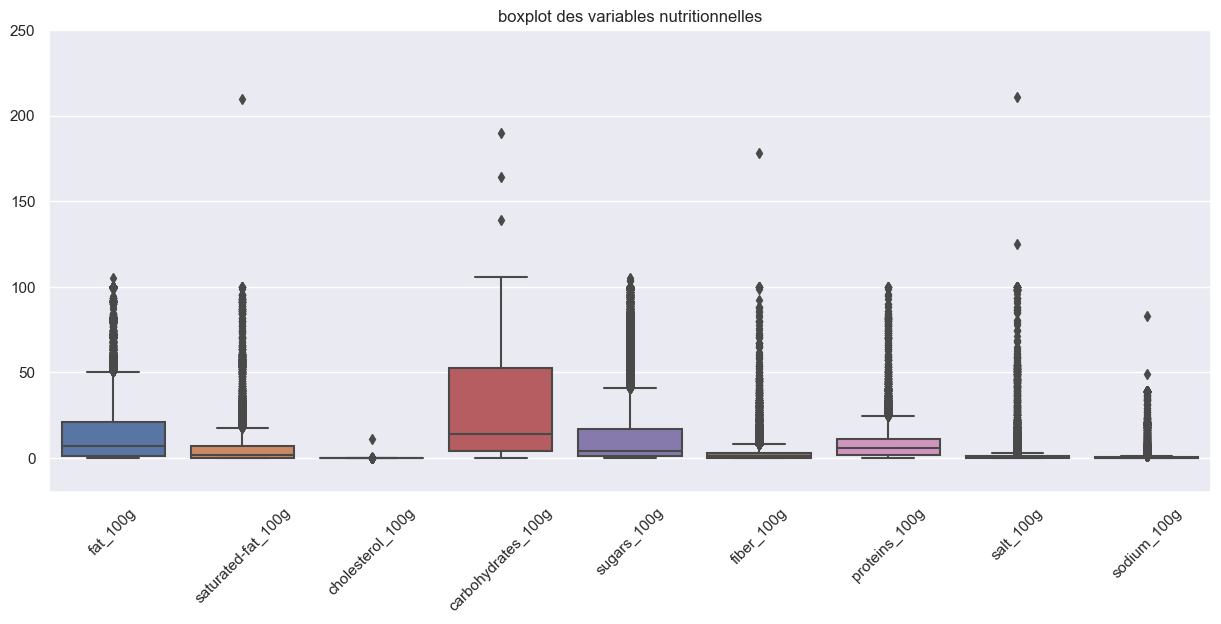

In [41]:
# visualisation des valeurs des variables avec boxplot
sns.set_theme()
fig = plt.figure(figsize=(15, 6))
ax = plt.axes() 
plt.xticks(rotation=45)
ax.set_ylim([-20,250])
sns.boxplot(data=df_food[variables_nutritionnelles]).set_title('boxplot des variables nutritionnelles');

In [42]:
# Pour les variables quantitatives selectionnées hormis energy_100g (variables nutritionnelles) on remplace les valeurs supérieur à 100 et inférieur à 0 par des valeurs NaN.
for variable in variables_nutritionnelles:
    df = (df_food[variable] > 100) | (df_food[variable] < 0)
    df_food.loc[df, variable]= np.nan

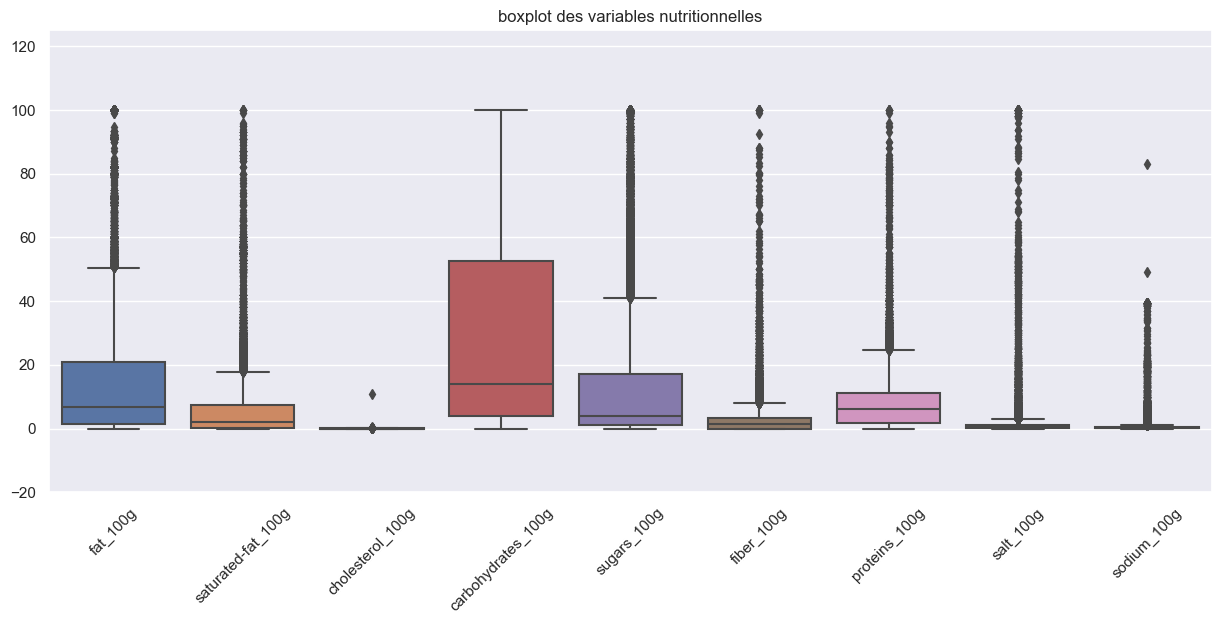

In [43]:
# visualisation des valeurs des variables avec boxplot
sns.set_theme()
fig = plt.figure(figsize=(15, 6))
ax = plt.axes() 
plt.xticks(rotation=45)
ax.set_ylim([-20,125])
sns.boxplot(data=df_food[variables_nutritionnelles]).set_title('boxplot des variables nutritionnelles');

On remarque que les modifications sont prises en comptes pour les variables selectionnées.

### 'fat_100g' et 'saturated-fat_100g'

In [44]:
# afficher la listes des variables quantitatives selectionnées 
Variables_quantitatives

['energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'nutrition-score-fr_100g']

In [45]:
# La variable 'saturated-fat_100g' est incluse dans 'fat_100g': 
# Si la valeur de 'saturated-fat_100g' atteint 100 alors 'fat_100g' prend la valeur 100 également.
# Si cette valeur(de 'saturated-fat_100g') dépasse la valeur de 'fat_100g'; dans ce cas on va la remplacer par NaN. 

df_food.loc[df_food['saturated-fat_100g'] == 100, 'fat_100g'] = 100
df_food.loc[df_food['saturated-fat_100g'] > df_food['fat_100g'], 'saturated-fat_100g'] = np.nan

In [46]:
df_food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94425 entries, 0 to 320770
Data columns (total 54 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   code                                     94425 non-null  object 
 1   url                                      94425 non-null  object 
 2   creator                                  94425 non-null  object 
 3   created_t                                94425 non-null  object 
 4   created_datetime                         94425 non-null  object 
 5   last_modified_t                          94425 non-null  object 
 6   last_modified_datetime                   94425 non-null  object 
 7   product_name                             87436 non-null  object 
 8   quantity                                 67767 non-null  object 
 9   packaging                                55927 non-null  object 
 10  packaging_tags                           5592

### 'salt_100g'  et  'sodium_100g'

In [47]:
# La variable'sodium_100g' est incluse dans 'salt_100g': 
# Si la valeur de 'sodium_100g' atteint 100 alors 'salt_100g' prend la valeur de 100 également.
# Si cette valeur(de 'sodium_100g) dépasse la valeur de 'salt_100g'; dans ce cas on va la remplacer par NaN. 

df_food.loc[df_food['sodium_100g'] == 100, 'salt_100g'] = 100
df_food.loc[df_food['sodium_100g'] > df_food['salt_100g'], 'sodium_100g'] = np.nan

### 'carbohydrates_100g' et 'sugars_100g'

In [48]:
# La variable'sugars_100g' est incluse dans 'carbohydrates_100g': 
# Si la valeur de 'carbohydrates_100g' atteint 100 alors 'carbohydrates_100g' prend la valeur 100 également.
# Si cette valeur(de 'sugars_100g') dépasse la valeur de 'carbohydrates_100g'; dans ce cas on va la remplacer par NaN. 

df_food.loc[df_food['sugars_100g'] == 100, 'carbohydrates_100g'] = 100
df_food.loc[df_food['sugars_100g'] > df_food['carbohydrates_100g'], 'sugars_100g'] = np.nan

### 'energy_100g'

On remarque que les valeurs d'energy dépasse 3765,6 kj (900 kcal) qui est la valeur maximale d'energie pour 100g dans un aliment, voir: https://www.radins.com/shopping/courses/les-10-aliments-les-plus-caloriques/1879

/Users/azizi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


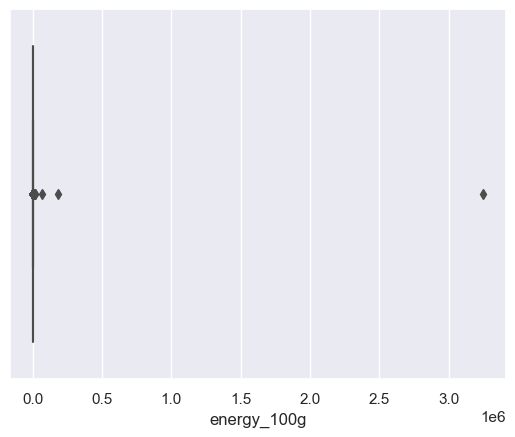

In [49]:
sns.boxplot(df_food['energy_100g'])
plt.show()

In [50]:
# On va remplacer les valeurs de la colonne 'energy_100g' qui sont supérieures à 3765.6 par 3765.6 
df_food.loc[df_food['energy_100g'] > 3765.6, 'energy_100g'] = 3765.6

/Users/azizi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


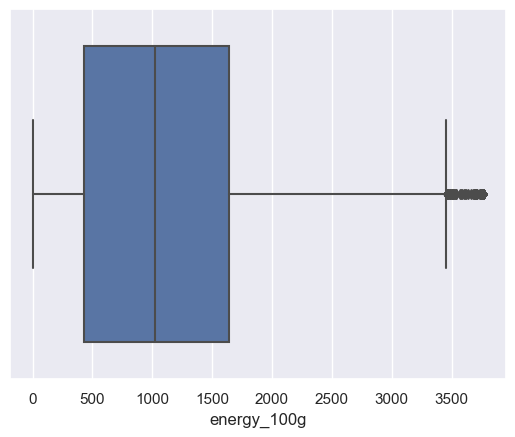

In [51]:
sns.boxplot(df_food['energy_100g'])
plt.show()

In [52]:
# On va garder seulement les colonnes qui peuvent être utiles pour l'application 
df_final = df_food.loc[:, variables_pertinentes]

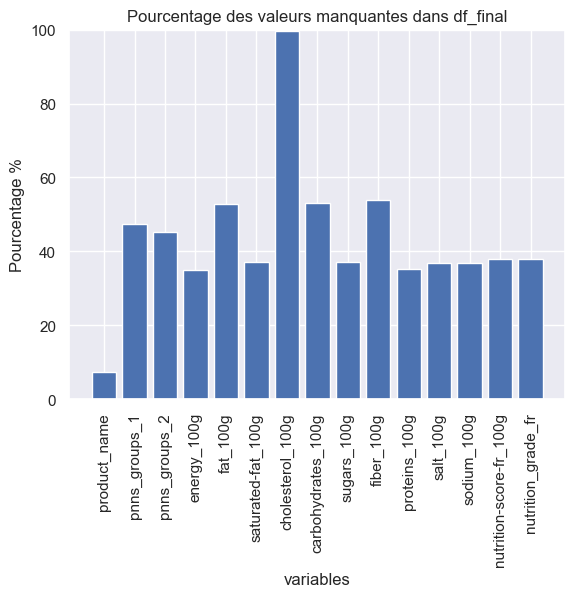

In [53]:
# Pourcentage des valeurs manquantes 
df_nan = df_final.isna().mean()*100
sns.set_theme()
plt.bar(df_nan.keys(), df_nan.values)
plt.xticks(rotation=90)
plt.ylim([0,100])
plt.ylabel("Pourcentage %")
plt.xlabel('variables')
plt.title('Pourcentage des valeurs manquantes dans df_final')
plt.show()

/Users/azizi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


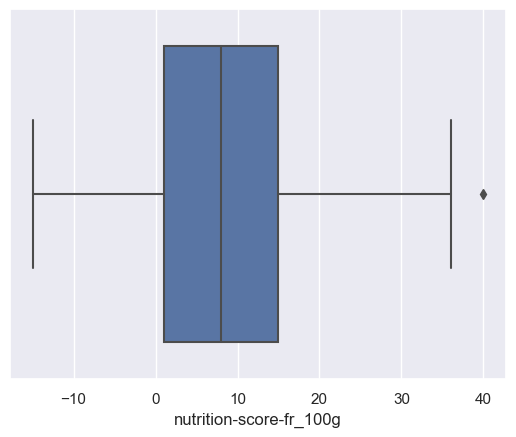

In [54]:
sns.boxplot(df_final['nutrition-score-fr_100g'])
plt.show()

In [55]:
# Traitement des valeurs aberrantes de nutrition-score-fr_100g avec la méthode des quantiles 
# On calcule Q1, Q3 et IQR

q1=df_final['nutrition-score-fr_100g'].quantile(q=0.25)
q3=df_final['nutrition-score-fr_100g'].quantile(q=0.75)
IQR=q3-q1

#On calcule la limite inférieure et supérieure

limite_inférieure = q1-1.5*IQR
limite_supérieure = q3 +1.5*IQR

# On garde les valeurs à l'intérieur de la limite inférieure et supérieure

df_final= df_final[df_final['nutrition-score-fr_100g']<limite_supérieure]
df_final=df_final[df_final['nutrition-score-fr_100g']>limite_inférieure]

/Users/azizi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


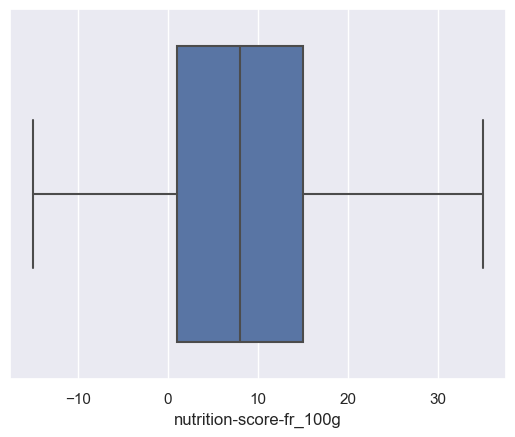

In [56]:
sns.boxplot(df_final['nutrition-score-fr_100g'])
plt.show()

### Traitement des valeurs manquantes des variables quantitatives

#### Median et cte : 'fiber_100g', 'cholesterol_100g', et 'proteins_100g'

In [57]:
# Pour les colonnes 'cholesterol_100g', 'fiber_100g' on va remplacer les valeurs manquantes groupées par pnns_groups_2 et pnns_groups_1 homogènes par la mediane 
# groupées par catégorie 'pnns_groups_1'

df_final.loc[:,  'cholesterol_100g'] = df_final['cholesterol_100g'].fillna(df_final.groupby('pnns_groups_1')['cholesterol_100g'].transform('median'))
df_final.loc[:,  'fiber_100g'] = df_final['fiber_100g'].fillna(df_final.groupby('pnns_groups_1')['fiber_100g'].transform('median'))

# groupées par catégorie 'pnns_groups_2'

df_final.loc[:,  'cholesterol_100g'] = df_final['cholesterol_100g'].fillna(df_final.groupby('pnns_groups_2')['cholesterol_100g'].transform('median'))
df_final.loc[:,  'fiber_100g'] = df_final['fiber_100g'].fillna(df_final.groupby('pnns_groups_2')['fiber_100g'].transform('median'))


In [58]:
# % de valeurs manquantes par colonne
df_final.isna().mean()*100

product_name                0.507857
pnns_groups_1              35.351653
pnns_groups_2              35.196047
energy_100g                 0.124827
fat_100g                   29.212907
saturated-fat_100g          0.253074
cholesterol_100g           35.290094
carbohydrates_100g         29.255656
sugars_100g                 0.282143
fiber_100g                  3.531061
proteins_100g               0.124827
salt_100g                   0.128247
sodium_100g                 0.124827
nutrition-score-fr_100g     0.000000
nutrition_grade_fr          0.000000
dtype: float64

In [59]:
# on va remplacer le reste des valeurs manquantes de la variable 'cholesterol_100g' par 0 (negligeable)
df_final.loc[:, 'cholesterol_100g'] = df_final['cholesterol_100g'].fillna(0)

# on va remplacer le reste des valeurs manquantes de la variable 'proteins_100g' par la médiane
df_final.loc[:, 'proteins_100g'] = df_final['proteins_100g'].fillna(df_final['proteins_100g'].median())


In [60]:
# % de valeurs manquantes par colonne
df_final.isna().mean()*100

product_name                0.507857
pnns_groups_1              35.351653
pnns_groups_2              35.196047
energy_100g                 0.124827
fat_100g                   29.212907
saturated-fat_100g          0.253074
cholesterol_100g            0.000000
carbohydrates_100g         29.255656
sugars_100g                 0.282143
fiber_100g                  3.531061
proteins_100g               0.000000
salt_100g                   0.128247
sodium_100g                 0.124827
nutrition-score-fr_100g     0.000000
nutrition_grade_fr          0.000000
dtype: float64

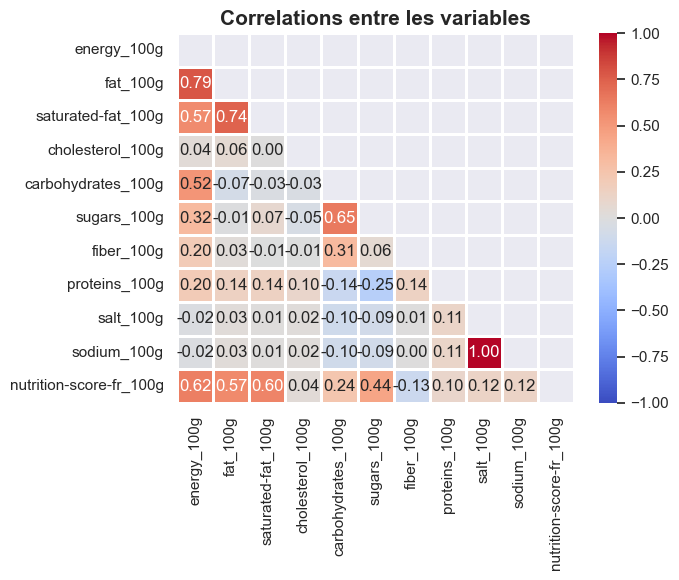

In [61]:
def correlation(df_final):
    mask = np.triu(np.ones_like(df_final.corr(), dtype=bool))
    sns.heatmap(df_final.corr(), mask=mask, cmap="coolwarm", center=0,
               linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
    plt.title('Correlations entre les variables', fontsize=15, fontweight='bold')
    plt.show()
correlation(df_final)

Corrélations entre les variables à titre d'exemple saturated-fat_100g et fat_100g, sugars_100g et carbohydrates_100g, sodium_100g et salt_100g, nutrition-score-fr_100g avec energy_100g, fat_100g et saturated-fat_100g.

On va commencer l'estimation des Nan de ces varaibles corrélées avec IterativeImputer qui est plus utile avec les variables corrélées https://towardsdatascience.com/iterative-imputation-with-scikit-learn-8f3eb22b1a38  

#### saturated-fat_100g , fat_100g 

In [62]:
# les colonnes saturated-fat_100g , fat_100g et 'nutrition-score-fr_100g' corrélées à traiter avec IterativeImputer
fat = ['fat_100g', 'saturated-fat_100g']

In [63]:
# Import du IterativeImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Estimation des Nan des colonnes 'fat_nutrition' avec IterativeImputer

impute_Iterative = IterativeImputer(random_state = 0, max_iter=20, min_value=[0,0], max_value=[100,100])
df_fat_imp = impute_Iterative.fit_transform(df_final[fat])

# remplacer les valeurs NaN
df_final[fat] = df_fat_imp


#### 'sugars_100g', 'carbohydrates_100g'

In [64]:
# les deux colonnes 'glucides' à traiter
glucides = ['sugars_100g', 'carbohydrates_100g']

# estimation des Nan avec IterativeImputer
impute_Iterative = IterativeImputer(random_state = 0, max_iter=20, min_value=[0,0], max_value=[100,100])
df_fat_imp = impute_Iterative.fit_transform(df_final[glucides])


# remplacer les valeurs NaN
df_final[glucides] = df_fat_imp


#### 'salt_100g', 'sodium_100g'

In [65]:
# les deux colonnes 'sel' à traiter
sel = ['salt_100g', 'sodium_100g']

# estimation des Nan avec IterativeImputer
impute_Iterative = IterativeImputer(random_state = 0, max_iter=20, min_value=[0,0], max_value=[100,100])
df_fat_imp = impute_Iterative.fit_transform(df_final[sel])

# remplacer les valeurs NaN
df_final[sel] = df_fat_imp

In [66]:
# % de valeurs manquantes par colonne
df_final.isna().mean()*100

product_name                0.507857
pnns_groups_1              35.351653
pnns_groups_2              35.196047
energy_100g                 0.124827
fat_100g                    0.000000
saturated-fat_100g          0.000000
cholesterol_100g            0.000000
carbohydrates_100g          0.000000
sugars_100g                 0.000000
fiber_100g                  3.531061
proteins_100g               0.000000
salt_100g                   0.000000
sodium_100g                 0.000000
nutrition-score-fr_100g     0.000000
nutrition_grade_fr          0.000000
dtype: float64


### 'energy_100g'

In [67]:
# Valeur énergétique moyenne des éléments nutritifs
Valeur_énergétique = pd.DataFrame(
           {"Élément nutritif" : ['Protéines', 'Lipides', 'Glucides'],
            "Cal/g" : ['4', '9', '4'],
            "kJ/g" : ['17', '38', '17']
           })
Valeur_énergétique

,Élément nutritif,Cal/g,kJ/g
0,Protéines,4,17
1,Lipides,9,38
2,Glucides,4,17


Valeur énergétique moyenne des éléments nutritifs :
En se référant à ce site en lien, on va calculer la valeur théorique de l’Energy_100g à partir des nutriments énergétiques ou les macronutriments représentés par les protéines, glucides et lipides. 
                      
https://www.nutrisens.com/vitalites/comment-decrypter-les-valeurs-nutritionnelles/


In [68]:
# calcul théorique de l'energy pour remplacer les valeurs NaN par les valeurs les plus proches des valeurs réelles 
df_final['calcul_energy'] = (17 * df_final['carbohydrates_100g'])+ (37 * df_final['fat_100g'])+(17 * df_final['proteins_100g'])

In [69]:
# remplacer les valeurs Nan par les valeurs calculée de energy calculée
df_final.loc[:, 'energy_100g']= df_final.energy_100g.fillna(df_final.calcul_energy)

In [70]:
# supprimer la colonne 'calcul_energy'

df_final = df_final.drop(['calcul_energy'], axis=1)
df_final

,product_name,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition_grade_fr
190,Mini Confettis,NaN,NaN,1753.0,6.347046,0.80,0.0,99.334971,87.70,0.9,0.60,0.0100,0.003937,14.0,d
191,Praliné Amande Et Noisette,NaN,NaN,2406.0,9.593964,2.90,0.0,63.490342,50.30,3.9,9.50,0.0030,0.001181,14.0,d
226,"Pepsi, Nouveau goût !",Beverages,Sweetened beverages,177.0,0.000000,0.00,0.0,10.400000,10.40,0.0,0.00,0.0254,0.010000,13.0,e
234,Tarte Poireaux Et Lardons,NaN,NaN,1079.0,22.117789,11.00,0.0,16.240603,1.00,1.4,7.50,0.8000,0.314961,15.0,d
240,7Up,Beverages,Sweetened beverages,177.0,0.000000,0.00,0.0,10.400000,10.40,0.1,0.00,0.1000,0.039370,13.0,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320740,Verrine Cheescake Myrtille,NaN,NaN,1084.0,23.663940,12.00,0.0,25.345523,10.50,0.0,8.70,0.2900,0.114173,16.0,d
320741,Fiche Brevet,NaN,NaN,4.0,6.656277,1.00,0.0,16.240603,1.00,10.0,10.00,10.0000,3.937008,0.0,b
320751,Tartines craquantes bio au sarrasin,Cereals and potatoes,Bread,1643.0,2.800000,0.60,0.0,74.800000,2.60,5.9,13.00,0.6800,0.267717,-4.0,a
320757,Amandes,NaN,NaN,2406.0,10.877269,3.73,0.0,19.010416,3.89,12.2,21.22,0.1000,0.039370,0.0,b


In [71]:
# % de valeurs manquantes par colonne
df_final.isna().mean()*100

product_name                0.507857
pnns_groups_1              35.351653
pnns_groups_2              35.196047
energy_100g                 0.000000
fat_100g                    0.000000
saturated-fat_100g          0.000000
cholesterol_100g            0.000000
carbohydrates_100g          0.000000
sugars_100g                 0.000000
fiber_100g                  3.531061
proteins_100g               0.000000
salt_100g                   0.000000
sodium_100g                 0.000000
nutrition-score-fr_100g     0.000000
nutrition_grade_fr          0.000000
dtype: float64

In [72]:
# Estimation du reste des Nan cholesterol_100g avec KNNImputer
from sklearn.impute import KNNImputer 
imputer = KNNImputer(n_neighbors=5)
df_nutritionnelles = df_final[Variables_quantitatives]
df_final[Variables_quantitatives] = imputer.fit_transform(df_nutritionnelles)

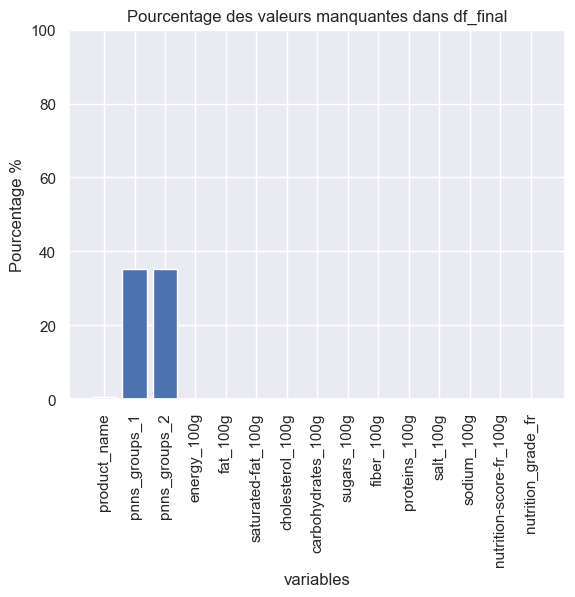

In [73]:
# % de valeurs manquantes par colonne

df_nan = df_final.isna().mean()*100
sns.set_theme()
plt.bar(df_nan.keys(), df_nan.values)
plt.xticks(rotation=90)
plt.ylim([0,100])
plt.ylabel("Pourcentage %")
plt.xlabel('variables')
plt.title('Pourcentage des valeurs manquantes dans df_final')
plt.show()

In [74]:
df_final

,product_name,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition_grade_fr
190,Mini Confettis,NaN,NaN,1753.0,6.347046,0.80,0.0,99.334971,87.70,0.9,0.60,0.0100,0.003937,14.0,d
191,Praliné Amande Et Noisette,NaN,NaN,2406.0,9.593964,2.90,0.0,63.490342,50.30,3.9,9.50,0.0030,0.001181,14.0,d
226,"Pepsi, Nouveau goût !",Beverages,Sweetened beverages,177.0,0.000000,0.00,0.0,10.400000,10.40,0.0,0.00,0.0254,0.010000,13.0,e
234,Tarte Poireaux Et Lardons,NaN,NaN,1079.0,22.117789,11.00,0.0,16.240603,1.00,1.4,7.50,0.8000,0.314961,15.0,d
240,7Up,Beverages,Sweetened beverages,177.0,0.000000,0.00,0.0,10.400000,10.40,0.1,0.00,0.1000,0.039370,13.0,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320740,Verrine Cheescake Myrtille,NaN,NaN,1084.0,23.663940,12.00,0.0,25.345523,10.50,0.0,8.70,0.2900,0.114173,16.0,d
320741,Fiche Brevet,NaN,NaN,4.0,6.656277,1.00,0.0,16.240603,1.00,10.0,10.00,10.0000,3.937008,0.0,b
320751,Tartines craquantes bio au sarrasin,Cereals and potatoes,Bread,1643.0,2.800000,0.60,0.0,74.800000,2.60,5.9,13.00,0.6800,0.267717,-4.0,a
320757,Amandes,NaN,NaN,2406.0,10.877269,3.73,0.0,19.010416,3.89,12.2,21.22,0.1000,0.039370,0.0,b


In [75]:
# Nombre de lignes et colonnes (taille du jeu de données df_final)
df_final.shape

(58481, 15)

### Traitement des valeurs manquantes des variables qualitatives


In [76]:
# conversion de la colonne nutrition_grade_fr en majuscule 
df_final['nutrition_grade_fr']= df_final['nutrition_grade_fr'].str.upper()

In [77]:
# afficher les 5 première valeur de la colonne nutrition_grade_fr
df_final['nutrition_grade_fr'].unique()

array(['D', 'E', 'C', 'B', 'A'], dtype=object)

In [78]:
# % de valeurs manquantes par colonne
df_final.isna().mean()*100

product_name                0.507857
pnns_groups_1              35.351653
pnns_groups_2              35.196047
energy_100g                 0.000000
fat_100g                    0.000000
saturated-fat_100g          0.000000
cholesterol_100g            0.000000
carbohydrates_100g          0.000000
sugars_100g                 0.000000
fiber_100g                  0.000000
proteins_100g               0.000000
salt_100g                   0.000000
sodium_100g                 0.000000
nutrition-score-fr_100g     0.000000
nutrition_grade_fr          0.000000
dtype: float64

In [79]:
#pour le reste des valeur NaN des deux colonnes pnns_groups_1 et pnns_groups_2 on va les remplacer par 'autre_groupe' et 'autre_produit' product_name
df_final.loc[:, 'pnns_groups_2']= df_final['pnns_groups_2'].fillna('autre_groupe')
df_final.loc[:, 'pnns_groups_1']= df_final['pnns_groups_1'].fillna('autre_groupe')
df_final.loc[:, 'product_name']= df_final['product_name'].fillna('autre_produit')

In [80]:
# % de valeurs manquantes par colonne
df_final.isna().mean()*100

product_name               0.0
pnns_groups_1              0.0
pnns_groups_2              0.0
energy_100g                0.0
fat_100g                   0.0
saturated-fat_100g         0.0
cholesterol_100g           0.0
carbohydrates_100g         0.0
sugars_100g                0.0
fiber_100g                 0.0
proteins_100g              0.0
salt_100g                  0.0
sodium_100g                0.0
nutrition-score-fr_100g    0.0
nutrition_grade_fr         0.0
dtype: float64

In [81]:
# Afficher les 5 premières lignes du jeu de données df_final

df_final.head()

,product_name,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition_grade_fr
190,Mini Confettis,autre_groupe,autre_groupe,1753.0,6.347046,0.8,0.0,99.334971,87.7,0.9,0.6,0.0100,0.003937,14.0,D
191,Praliné Amande Et Noisette,autre_groupe,autre_groupe,2406.0,9.593964,2.9,0.0,63.490342,50.3,3.9,9.5,0.0030,0.001181,14.0,D
226,"Pepsi, Nouveau goût !",Beverages,Sweetened beverages,177.0,0.000000,0.0,0.0,10.400000,10.4,0.0,0.0,0.0254,0.010000,13.0,E
234,Tarte Poireaux Et Lardons,autre_groupe,autre_groupe,1079.0,22.117789,11.0,0.0,16.240603,1.0,1.4,7.5,0.8000,0.314961,15.0,D
240,7Up,Beverages,Sweetened beverages,177.0,0.000000,0.0,0.0,10.400000,10.4,0.1,0.0,0.1000,0.039370,13.0,E


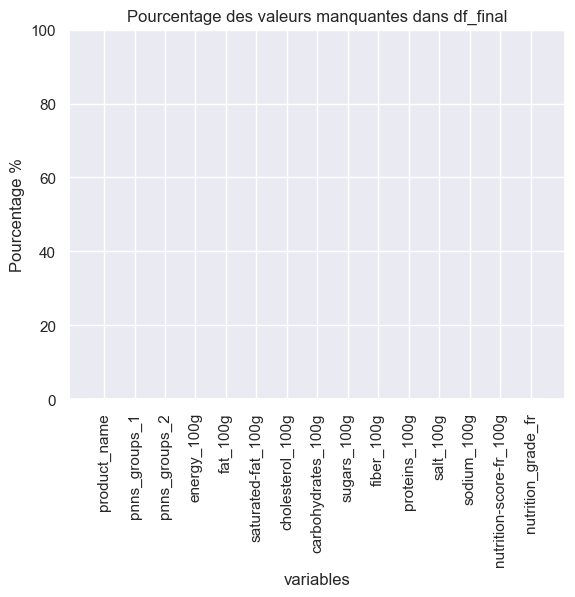

In [82]:
# Pourcentage des valeurs manquantes 
df_nan = df_final.isna().mean()*100
sns.set_theme()
plt.bar(df_nan.keys(), df_nan.values)
plt.xticks(rotation=90)
plt.ylim([0,100])
plt.ylabel("Pourcentage %")
plt.xlabel('variables')
plt.title('Pourcentage des valeurs manquantes dans df_final')
plt.show()

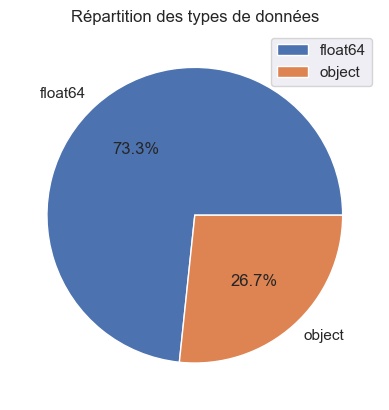

In [83]:
# visualisation de types des données dans le jeu df_final
df_final.dtypes.value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                   title="Répartition des types de données",
                                   legend=True, label="")
sns.set_theme()
plt.show()

In [84]:
# Enregistrez le DataFrame en tant que fichier csv à l'aide de la méthode to_csv() 
df_final.to_csv('df_final.csv', index=False)